In [1]:
# 패키지 import
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# 데이터 셋 준비
imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
# One Hot　encoding
def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0
    return results

# 훈련데이터와 평가데이터를 One Hot encoding
train_data = multi_hot_sequences(train_data, dimension=10000)
test_data = multi_hot_sequences(test_data, dimension=10000)

In [4]:
# 선두 훈련데이터 확인
train_data[0]

array([0., 1., 1., ..., 0., 0., 0.])

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


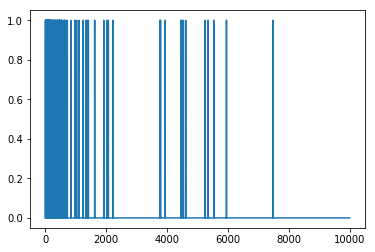

In [5]:
# 선두 훈련데이터 플롯
plt.plot(train_data[0])

In [6]:
# 적당한 용량의 모델구조 작성
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 모델 컴파일
baseline_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'])

# 모델 개요 표시
baseline_model.summary()

# 학습
baseline_history = baseline_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.4679 - acc: 0.8020 - binary_crossentropy: 0.4679 - val_loss: 0.3215 - val_acc: 0.8798 - val_binary_crossentropy: 0.3215
Epoch 2/20
 - 3s - loss: 0.2367 - acc: 0.9154 - binary_crossentropy: 0.2367 - val_loss: 0.2853 - val_acc: 0.8865 - val_binary_crossentropy: 0.2853
Epoch 3/20
 - 3s - loss: 0.1739 - acc: 0.9405 - binary_c

In [7]:
# 작은 용량의 모델구조 작성
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(4, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 모델 컴파일
smaller_model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'])

# 모델개요 표시
smaller_model.summary()

# 학습
smaller_history = smaller_model.fit(
    train_data,
    train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6046 - acc: 0.6552 - binary_crossentropy: 0.6046 - val_loss: 0.5359 - val_acc: 0.7767 - val_binary_crossentropy: 0.5359
Epoch 2/20
 - 3s - loss: 0.4832 - acc: 0.8456 - binary_crossentropy: 0.4832 - val_loss: 0.4784 - val_acc: 0.8530 - val_binary_crossentropy: 0.4784
Epoch 3/20
 - 3s - loss: 0.4254 - acc: 0.8986 - binary_cro

In [8]:
# 큰용량 모델구조 작성
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 모델 컴파일
bigger_model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','binary_crossentropy'])

# 모델 개요 표시
bigger_model.summary()

# 학습
bigger_history = bigger_model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________
Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 11s - loss: 0.3478 - acc: 0.8493 - binary_crossentropy: 0.3478 - val_loss: 0.2981 - val_acc: 0.8787 - val_binary_crossentropy: 0.2981
Epoch 2/20
 - 10s - loss: 0.1485 - acc: 0.9448 - binary_crossentropy: 0.1485 - val_loss: 0.3514 - val_acc: 0.8670 - val_binary_crossentropy: 0.3514
Epoch 3/20
 - 10s - loss: 0.0555 - acc: 0.9833 - b

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


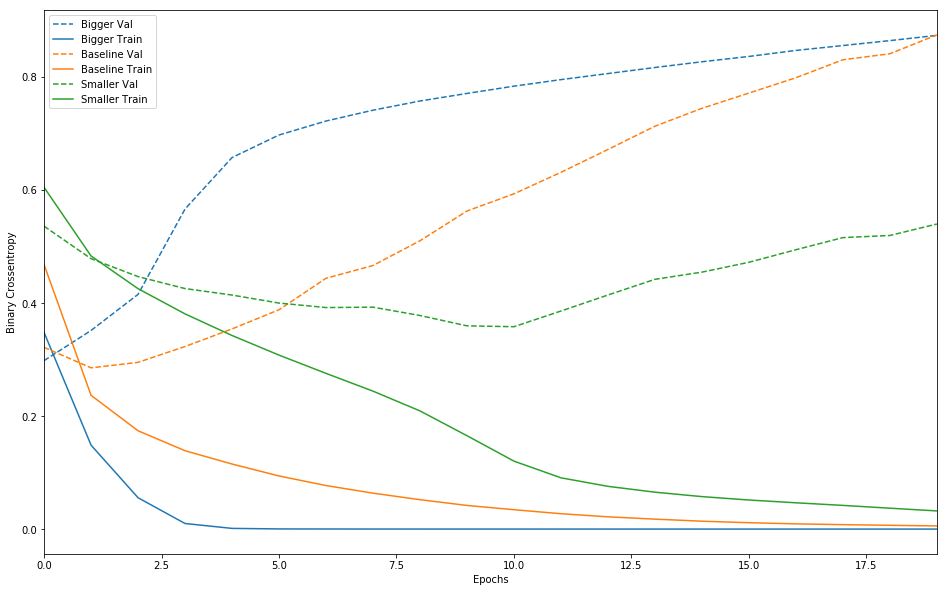

In [9]:
# 그래프 표시
def plot_history(histories, key='binary_crossentropy'):
    plt.figure(figsize=(16,10))
    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
            '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
            label=name.title()+' Train')
    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])

# 그래프 표시 실행
plot_history([
    ('bigger', bigger_history),
    ('baseline', baseline_history),
    ('smaller', smaller_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.5379 - acc: 0.7843 - binary_crossentropy: 0.5010 - val_loss: 0.3836 - val_acc: 0.8760 - val_binary_crossentropy: 0.3454
Epoch 2/20
 - 3s - loss: 0.3070 - acc: 0.9078 - binary_crossentropy: 0.2639 - val_loss: 0.3325 - val_acc: 0.8881 - val_binary_crossentropy: 0.2858
Epoch 3/20
 - 3s - loss: 0.2546 - acc: 0.9280 - binary_crossentropy: 0.2053 - val_loss: 0.3342 - val_acc: 0.8866 - val_binary_crossentropy: 0.2829
Epoch 4/20
 - 3s - loss: 0.2294 - acc: 0.9396 - binary_crossentropy: 0.1764 - val_loss: 0.3451 - val_acc: 0.8832 - val_binary_crossentropy: 0.2908
Epoch 5/20
 - 3s - loss: 0.2158 - acc: 0.9460 - binary_crossentropy: 0.1600 - val_loss: 0.3586 - val_acc: 0.8805 - val_binary_crossentropy: 0.3017
Epoch 6/20
 - 3s - loss: 0.2026 - acc: 0.9515 - binary_crossentropy: 0.1450 - val_loss: 0.3734 - val_acc: 0.8766 - val_binary_crossentropy: 0.3152
Epoch 7/20
 - 3s - loss: 0.1955 - acc: 0.9542 - binary_crossentropy:

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


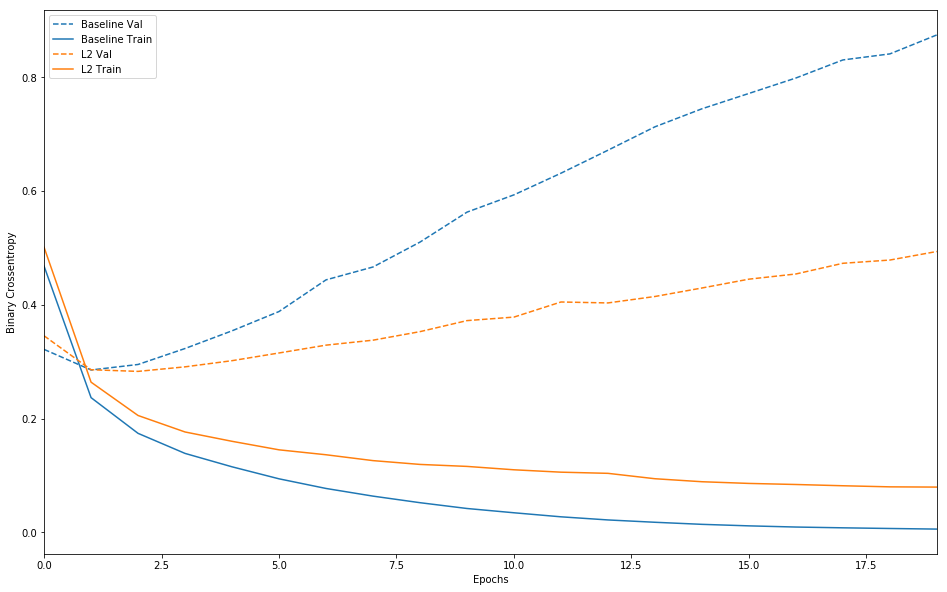

In [10]:
# 정규화 모델구조 작성
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, 
        kernel_regularizer=keras.regularizers.l2(0.001),
        activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dense(16, 
        kernel_regularizer=keras.regularizers.l2(0.001),
        activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 모델 컴파일
l2_model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', 'binary_crossentropy'])

# 학습
l2_model_history = l2_model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

# 그래프 표시
plot_history([
    ('baseline', baseline_history),
    ('l2', l2_model_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 3s - loss: 0.6274 - acc: 0.6510 - binary_crossentropy: 0.6274 - val_loss: 0.5080 - val_acc: 0.8349 - val_binary_crossentropy: 0.5080
Epoch 2/20
 - 3s - loss: 0.4659 - acc: 0.8134 - binary_crossentropy: 0.4659 - val_loss: 0.3653 - val_acc: 0.8783 - val_binary_crossentropy: 0.3653
Epoch 3/20
 - 3s - loss: 0.3534 - acc: 0.8731 - binary_crossentropy: 0.3534 - val_loss: 0.2979 - val_acc: 0.8891 - val_binary_crossentropy: 0.2979
Epoch 4/20
 - 3s - loss: 0.2892 - acc: 0.8986 - binary_crossentropy: 0.2892 - val_loss: 0.2769 - val_acc: 0.8882 - val_binary_crossentropy: 0.2769
Epoch 5/20
 - 3s - loss: 0.2532 - acc: 0.9148 - binary_crossentropy: 0.2532 - val_loss: 0.2840 - val_acc: 0.8872 - val_binary_crossentropy: 0.2840
Epoch 6/20
 - 3s - loss: 0.2137 - acc: 0.9291 - binary_crossentropy: 0.2137 - val_loss: 0.2915 - val_acc: 0.8872 - val_binary_crossentropy: 0.2915
Epoch 7/20
 - 3s - loss: 0.1922 - acc: 0.9379 - binary_crossentropy:

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


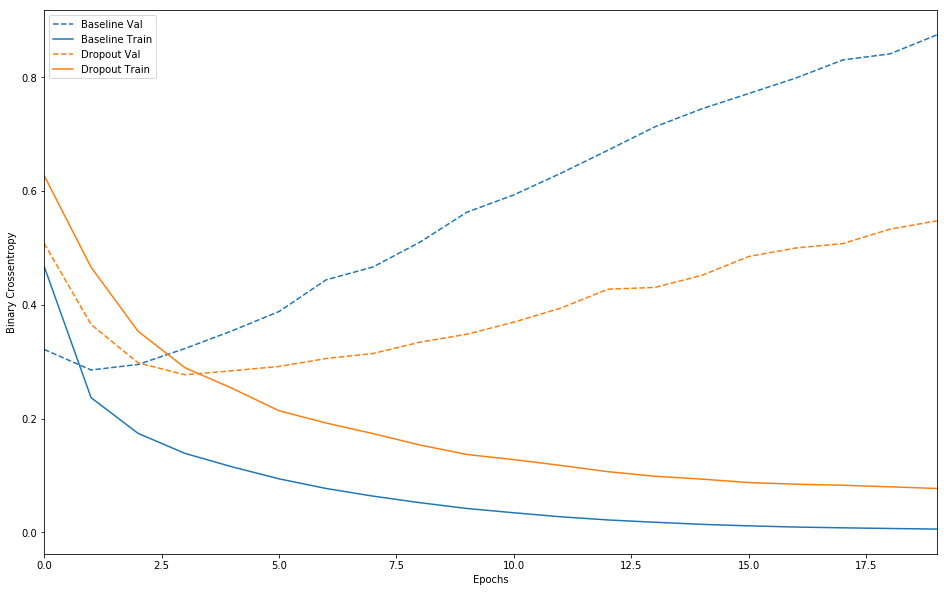

In [11]:
# 드롭 모델구조 작성
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 모델 컴파일
dpt_model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','binary_crossentropy'])

# 학습
dpt_model_history = dpt_model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

# 그래프 표시
plot_history([
    ('baseline', baseline_history),
    ('dropout', dpt_model_history)])

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
 - 4s - loss: 0.6668 - acc: 0.5957 - binary_crossentropy: 0.6668 - val_loss: 0.6244 - val_acc: 0.7538 - val_binary_crossentropy: 0.6244
Epoch 2/20
 - 3s - loss: 0.5911 - acc: 0.7236 - binary_crossentropy: 0.5911 - val_loss: 0.5178 - val_acc: 0.8564 - val_binary_crossentropy: 0.5178
Epoch 3/20
 - 3s - loss: 0.5114 - acc: 0.7679 - binary_crossentropy: 0.5114 - val_loss: 0.4161 - val_acc: 0.8798 - val_binary_crossentropy: 0.4161
Epoch 4/20
 - 3s - loss: 0.4492 - acc: 0.8167 - binary_crossentropy: 0.4492 - val_loss: 0.3565 - val_acc: 0.8853 - val_binary_crossentropy: 0.3565
Epoch 5/20
 - 3s - loss: 0.4077 - acc: 0.8497 - binary_crossentropy: 0.4077 - val_loss: 0.3261 - val_acc: 0.8873 - val_binary_crossentropy: 0.3261
Epoch 6/20
 - 3s - loss: 0.3734 - acc: 0.8655 - binary_crossentropy: 0.3734 - val_loss: 0.3118 - val_acc: 0.8878 - val_binary_crossentropy: 0.3118
Epoch 7/20
 - 3s - loss: 0.3515 - acc: 0.8751 - binary_crossentropy:

/Users/furukawahidekazu/anaconda3/envs/turicreate/lib/python3.6/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


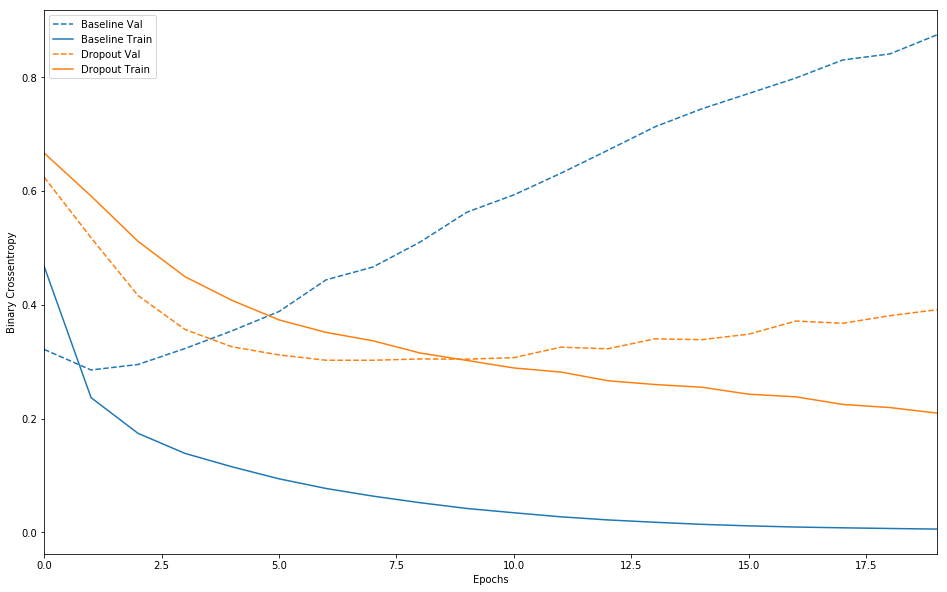

In [13]:
# 드롭 모델구조 작성
dpt_model = keras.models.Sequential([
    keras.layers.Dense(8, activation=tf.nn.relu, input_shape=(10000,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

# 모델 컴파일
dpt_model.compile(optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy','binary_crossentropy'])

# 학습
dpt_model_history = dpt_model.fit(
    train_data, train_labels,
    epochs=20,
    batch_size=512,
    validation_data=(test_data, test_labels),
    verbose=2)

# 그래프 표시
plot_history([
    ('baseline', baseline_history),
    ('dropout', dpt_model_history)])